Analyze a real-world real estate dataset to assess data quality,
structure, for predictive modeling.

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
data = pd.read_csv("real_estate.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_10136\2970908500.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("real_estate.csv")


In [ ]:
data.head()

,Date Recorded,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Longitude,Latitude
0,2021-04-14,2020,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,-73.06822,41.35014
1,2021-05-26,2020,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN
2,2021-09-13,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN
3,2020-12-14,2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN
4,2021-09-07,2020,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN


In [ ]:
data.describe()

,List Year,Assessed Value,Sale Amount,Sales Ratio,Longitude,Latitude
count,1.054159e+06,1.054159e+06,1.054159e+06,1.054159e+06,254643.000000,254643.000000
mean,2.010774e+03,2.797416e+05,3.990286e+05,9.953241e+00,-72.878565,41.499377
std,6.540711e+00,1.650117e+06,5.229758e+06,1.838434e+03,0.446531,0.258100
min,2.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-121.230910,34.345810
25%,2.004000e+03,8.845000e+04,1.422000e+05,4.816008e-01,-73.198040,41.292266
50%,2.011000e+03,1.395800e+05,2.300000e+05,6.162887e-01,-72.900600,41.504259
75%,2.017000e+03,2.270000e+05,3.700000e+05,7.764000e-01,-72.633226,41.714357
max,2.021000e+03,8.815100e+08,5.000000e+09,1.226420e+06,-71.187550,44.934590


In [ ]:
data.shape

(1054159, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054159 entries, 0 to 1054158
Data columns (total 11 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Date Recorded     1054157 non-null  object 
 1   List Year         1054159 non-null  int64  
 2   Town              1054159 non-null  object 
 3   Address           1054108 non-null  object 
 4   Assessed Value    1054159 non-null  float64
 5   Sale Amount       1054159 non-null  float64
 6   Sales Ratio       1054159 non-null  float64
 7   Property Type     671713 non-null   object 
 8   Residential Type  660275 non-null   object 
 9   Longitude         254643 non-null   float64
 10  Latitude          254643 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 88.5+ MB


In [ ]:
data.isnull().sum()

Date Recorded            2
List Year                0
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    393884
Longitude           799516
Latitude            799516
dtype: int64


Date Recorded	:	0.0002% missing data

List Year	:	0% missing data

Town	:	0% missing data

Address	:	0.0048% missing data

Assessed Value	:	0% missing data

Sale Amount	:	0% missing data

Sales Ratio	:	0% missing data

Property Type	:	36.27% missing data

Residential Type	:	37.36% missing data

Longitude	:	75.85% missing data

Latitude	:	75.85% missing data

In [ ]:
data.columns

Index(['Date Recorded', 'List Year', 'Town', 'Address', 'Assessed Value',
       'Sale Amount', 'Sales Ratio', 'Property Type', 'Residential Type',
       'Longitude', 'Latitude'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.lower().str.replace(" ", "_")

In [ ]:
data.columns

Index(['date_recorded', 'list_year', 'town', 'address', 'assessed_value',
       'sale_amount', 'sales_ratio', 'property_type', 'residential_type',
       'longitude', 'latitude'],
      dtype='object')

In [ ]:
data = data[data["date_recorded"].notna()]

In [ ]:
data.isnull().sum()

date_recorded            0
list_year                0
town                     0
address                 49
assessed_value           0
sale_amount              0
sales_ratio              0
property_type       382444
residential_type    393882
longitude           799514
latitude            799514
dtype: int64

In [ ]:
data.shape

(1054157, 11)

In [ ]:
data.head()

,date_recorded,list_year,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type,longitude,latitude
0,2021-04-14,2020,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,-73.06822,41.35014
1,2021-05-26,2020,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN
2,2021-09-13,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN
3,2020-12-14,2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN
4,2021-09-07,2020,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN


In [ ]:
data.isnull().sum()

date_recorded            0
list_year                0
town                     0
address                 49
assessed_value           0
sale_amount              0
sales_ratio              0
property_type       382444
residential_type    393882
longitude           799514
latitude            799514
dtype: int64

there are only 49 null values in address column so i will drop the rows that has null values in address column 

In [ ]:
data = data[data["address"].notna()]

In [ ]:
data.isnull().sum()

date_recorded            0
list_year                0
town                     0
address                  0
assessed_value           0
sale_amount              0
sales_ratio              0
property_type       382399
residential_type    393837
longitude           799470
latitude            799470
dtype: int64

In [ ]:
data["address"].value_counts()

address
MULTI ADDRESSES          620
8 SOUTH RD               471
51 OLD SPRINGFIELD RD    193
312 N BISHOP AVE         114
RIGGS ST                 106
                        ... 
299 NORTH AVENUE           1
56 GARTHWAIT RD            1
1265 WOODTICK RD           1
50 BRISTOL RD              1
9 PARSELL LANE             1
Name: count, Length: 747237, dtype: int64

check if there are any values with ["unknown","error" , 0 , -1 , "n/a", "na", "none","null","NaN"] in them

so i can clean them 

In [ ]:
bad_values = ["unknown","error" , 0 , -1 , "n/a", "na", "none","null","NaN"]

data.isin(bad_values).any()

date_recorded       False
list_year           False
town                False
address             False
assessed_value       True
sale_amount          True
sales_ratio          True
property_type       False
residential_type    False
longitude           False
latitude            False
dtype: bool

In [ ]:
data.isin(bad_values).sum()

date_recorded          0
list_year              0
town                   0
address                0
assessed_value      7030
sale_amount         1783
sales_ratio         8559
property_type          0
residential_type       0
longitude              0
latitude               0
dtype: int64

these are all the rows with bad values  

i will also replaace them with nan values 

In [ ]:
data[data.isin(bad_values).any(axis = 1)]

,date_recorded,list_year,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type,longitude,latitude
310,2002-03-27,2001,Hartford,46-48 DEERFIELD AVE,58030.0,0.0,0.0,NaN,NaN,NaN,NaN
610,2021-01-07,2020,Groton,69 A ST,0.0,29000.0,0.0,Residential,Single Family,NaN,NaN
934,2021-07-23,2020,Groton,3 WATER ST UNIT 304,0.0,600000.0,0.0,Residential,Condo,NaN,NaN
1055,2021-08-13,2020,Cheshire,56 MACKENZIE WILLOW TERR,0.0,624382.0,0.0,Residential,Condo,-72.913980,41.504210
1260,2021-07-07,2020,Killingworth,2 WOODLAND TRAIL,0.0,184995.0,0.0,Residential,Single Family,-72.563280,41.374340
...,...,...,...,...,...,...,...,...,...,...,...
1045775,2021-12-02,2021,New Haven,495 ORANGE ST,0.0,900000.0,0.0,Commercial,NaN,-72.917564,41.313989
1045842,2022-08-23,2021,Ridgefield,6 NEW ST,10.0,1450000.0,0.0,Residential,Single Family,-73.501479,41.285206
1046137,2021-11-10,2021,Waterbury,50 CAPTAIN NEVILLE DR,0.0,260000.0,0.0,Commercial,NaN,-72.980020,41.542223
1053309,2021-12-27,2021,Wolcott,CT DOT RT69,0.0,20000.0,0.0,Vacant Land,NaN,-72.983599,41.609261


In [ ]:
data = data.replace(bad_values, np.nan)

In [ ]:
data.isnull().sum()

date_recorded            0
list_year                0
town                     0
address                  0
assessed_value        7030
sale_amount           1783
sales_ratio           8559
property_type       382399
residential_type    393837
longitude           799470
latitude            799470
dtype: int64

In [ ]:
data.dtypes

date_recorded        object
list_year             int64
town                 object
address              object
assessed_value      float64
sale_amount         float64
sales_ratio         float64
property_type        object
residential_type     object
longitude           float64
latitude            float64
dtype: object

i will lower the values in each rows so it will be easy for models to make prediction 

In [ ]:
data[["town" , "address" , "property_type" , "residential_type"]] = data[["town" ,
                                                                           "address" ,
                                                                             "property_type" ,
                                                                               "residential_type"]].apply(lambda x: x.str.lower())

In [ ]:
data.head()

,date_recorded,list_year,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type,longitude,latitude
0,2021-04-14,2020,ansonia,323 beaver st,133000.0,248400.0,0.5354,residential,single family,-73.06822,41.35014
1,2021-05-26,2020,ansonia,152 jackson st,110500.0,239900.0,0.4606,residential,three family,NaN,NaN
2,2021-09-13,2020,ansonia,230 wakelee ave,150500.0,325000.0,0.4630,commercial,NaN,NaN,NaN
3,2020-12-14,2020,ansonia,57 platt st,127400.0,202500.0,0.6291,residential,two family,NaN,NaN
4,2021-09-07,2020,avon,245 new road,217640.0,400000.0,0.5441,residential,single family,NaN,NaN


In [ ]:
data.isnull().sum()

date_recorded            0
list_year                0
town                     0
address                  0
assessed_value        7030
sale_amount           1783
sales_ratio           8559
property_type       382399
residential_type    393837
longitude           799470
latitude            799470
dtype: int64

In [ ]:
data["sales_ratio"].head()

0    0.5354
1    0.4606
2    0.4630
3    0.6291
4    0.5441
Name: sales_ratio, dtype: float64

i will drop the sales ratio column for now and after filling the null values in assessed_value and sale_amount i will make a  new sales ratio column we will fill that column by doing assessed_value / sale_amount = sales_ratio [ it also helps prevent data leakage]

In [ ]:
data = data.drop(["sales_ratio" , "latitude" , "longitude" , "address"],axis = 1)

In [ ]:
data.head()

,date_recorded,list_year,town,assessed_value,sale_amount,property_type,residential_type
0,2021-04-14,2020,ansonia,133000.0,248400.0,residential,single family
1,2021-05-26,2020,ansonia,110500.0,239900.0,residential,three family
2,2021-09-13,2020,ansonia,150500.0,325000.0,commercial,NaN
3,2020-12-14,2020,ansonia,127400.0,202500.0,residential,two family
4,2021-09-07,2020,avon,217640.0,400000.0,residential,single family


In [ ]:
data['date_recorded'] = pd.to_datetime(data['date_recorded'])

In [ ]:
data.head()

,date_recorded,list_year,town,assessed_value,sale_amount,property_type,residential_type
0,2021-04-14,2020,ansonia,133000.0,248400.0,residential,single family
1,2021-05-26,2020,ansonia,110500.0,239900.0,residential,three family
2,2021-09-13,2020,ansonia,150500.0,325000.0,commercial,NaN
3,2020-12-14,2020,ansonia,127400.0,202500.0,residential,two family
4,2021-09-07,2020,avon,217640.0,400000.0,residential,single family


In [ ]:
data['sale_year'] = data["date_recorded"].dt.year
data['sale_month'] = data["date_recorded"].dt.month

In [ ]:
data.head()

,date_recorded,list_year,town,assessed_value,sale_amount,property_type,residential_type,sale_year,sale_month
0,2021-04-14,2020,ansonia,133000.0,248400.0,residential,single family,2021,4
1,2021-05-26,2020,ansonia,110500.0,239900.0,residential,three family,2021,5
2,2021-09-13,2020,ansonia,150500.0,325000.0,commercial,NaN,2021,9
3,2020-12-14,2020,ansonia,127400.0,202500.0,residential,two family,2020,12
4,2021-09-07,2020,avon,217640.0,400000.0,residential,single family,2021,9


In [ ]:
data = data.drop(["date_recorded"], axis = 1)

In [ ]:
data.head()

,list_year,town,assessed_value,sale_amount,property_type,residential_type,sale_year,sale_month
0,2020,ansonia,133000.0,248400.0,residential,single family,2021,4
1,2020,ansonia,110500.0,239900.0,residential,three family,2021,5
2,2020,ansonia,150500.0,325000.0,commercial,NaN,2021,9
3,2020,ansonia,127400.0,202500.0,residential,two family,2020,12
4,2020,avon,217640.0,400000.0,residential,single family,2021,9


In [ ]:
data.isnull().sum()

list_year                0
town                     0
assessed_value        7030
sale_amount           1783
property_type       382399
residential_type    393837
sale_year                0
sale_month               0
dtype: int64

No reliable target variable for prediction

High missingness in categorical variables

total precentage of null values in each column of dataset 

assessed_value = 0.6668 

sale_amount = 0.1691 

property_type = 36.27 

residential_type = 37.36

there is nothing usefull that can be predicted so  i will drop the rows with null values 

In [ ]:
data = data.dropna()

In [ ]:
data.head()

,list_year,town,assessed_value,sale_amount,property_type,residential_type,sale_year,sale_month
0,2020,ansonia,133000.0,248400.0,residential,single family,2021,4
1,2020,ansonia,110500.0,239900.0,residential,three family,2021,5
3,2020,ansonia,127400.0,202500.0,residential,two family,2020,12
4,2020,avon,217640.0,400000.0,residential,single family,2021,9
5,2020,avon,528490.0,775000.0,residential,single family,2020,12


In [ ]:
data.isnull().sum()

list_year           0
town                0
assessed_value      0
sale_amount         0
property_type       0
residential_type    0
sale_year           0
sale_month          0
dtype: int64

In [ ]:
data["sales_ratio"] = (data["assessed_value"] / data["sale_amount"] ).round(4)

In [ ]:
data.head()

,list_year,town,assessed_value,sale_amount,property_type,residential_type,sale_year,sale_month,sales_ratio
0,2020,ansonia,133000.0,248400.0,residential,single family,2021,4,0.5354
1,2020,ansonia,110500.0,239900.0,residential,three family,2021,5,0.4606
3,2020,ansonia,127400.0,202500.0,residential,two family,2020,12,0.6291
4,2020,avon,217640.0,400000.0,residential,single family,2021,9,0.5441
5,2020,avon,528490.0,775000.0,residential,single family,2020,12,0.6819


In [ ]:
(data["sales_ratio"] > 1).any()

np.True_

In [ ]:
data[data["sales_ratio"] > 1]

,list_year,town,assessed_value,sale_amount,property_type,residential_type,sale_year,sale_month,sales_ratio
40,2020,coventry,83400.0,65000.0,residential,single family,2021,4,1.2831
330,2020,colebrook,203700.0,178000.0,residential,single family,2020,12,1.1444
366,2020,east lyme,334600.0,260000.0,residential,single family,2021,5,1.2869
368,2020,madison,218500.0,200000.0,residential,single family,2021,3,1.0925
393,2020,litchfield,163640.0,75000.0,residential,single family,2021,1,2.1819
...,...,...,...,...,...,...,...,...,...
1053962,2021,wethersfield,135190.0,50000.0,residential,single family,2022,8,2.7038
1054015,2021,watertown,67700.0,60000.0,residential,single family,2022,5,1.1283
1054026,2021,west haven,97090.0,84193.0,residential,single family,2022,7,1.1532
1054065,2021,windsor locks,160300.0,76250.0,residential,two family,2022,1,2.1023


A sales_ratio of 1 means :

the assessed value and the sale price are the same.

A sales_ratio greater than 1 means :

the property was assessed for more than it actually sold for.

A sales_ratio less than 1 means :

the property was assessed for less than it sold for.

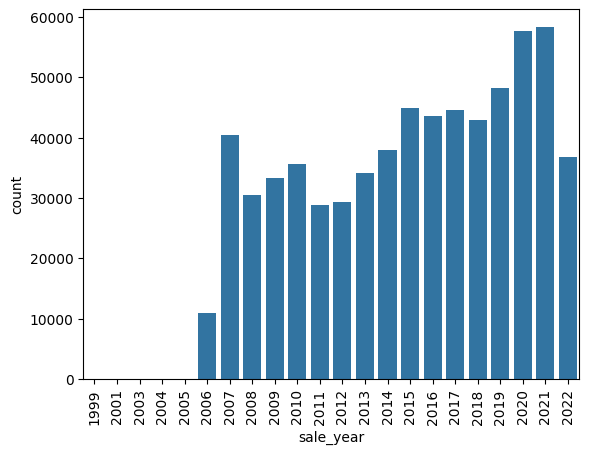

sale_year
1999        1
2001        6
2003        1
2004        6
2005        3
2006    10876
2007    40504
2008    30484
2009    33320
2010    35591
2011    28783
2012    29368
2013    34160
2014    38042
2015    44854
2016    43565
2017    44518
2018    42940
2019    48236
2020    57668
2021    58331
2022    36826
Name: count, dtype: int64

In [ ]:
sns.countplot(x="sale_year", data=data)
plt.xticks(rotation = 90)
plt.show()
data["sale_year"].value_counts().sort_index()

most sales we done in year 2001 

sales were 58331 so this indicates 8.863 % sales happened in 2021

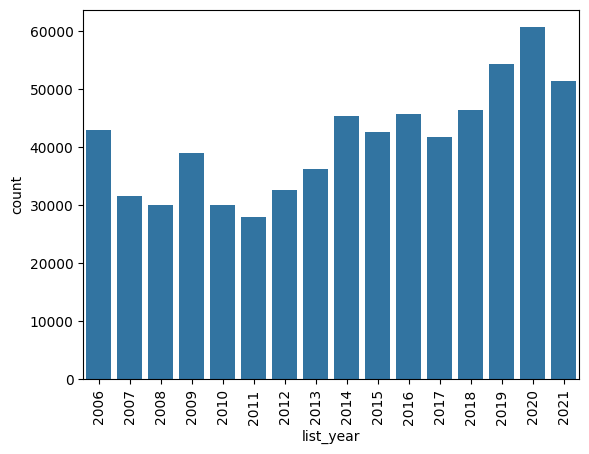

list_year
2006    42850
2007    31482
2008    29969
2009    38902
2010    30028
2011    27986
2012    32644
2013    36232
2014    45379
2015    42667
2016    45767
2017    41674
2018    46355
2019    54239
2020    60610
2021    51299
Name: count, dtype: int64

In [ ]:
sns.countplot(x="list_year", data=data)
plt.xticks(rotation = 90)
plt.show()
data["list_year"].value_counts().sort_index() 

most properties were listed in year 2020 

658083 properties were listed in 2020 make it 9.21% of the total properties

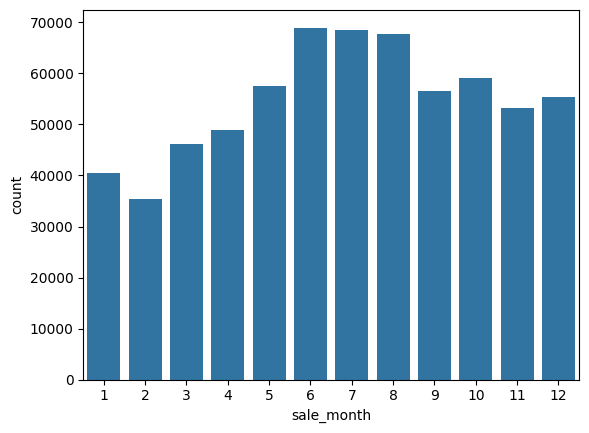

sale_month
1     40511
2     35334
3     46134
4     49010
5     57590
6     68985
7     68456
8     67675
9     56636
10    59085
11    53196
12    55471
Name: count, dtype: int64

In [ ]:
sns.countplot(x="sale_month", data=data)
plt.show()
data["sale_month"].value_counts().sort_index() 

In [ ]:
data.shape

(658083, 9)

In [ ]:
data.head()

,list_year,town,assessed_value,sale_amount,property_type,residential_type,sale_year,sale_month,sales_ratio
0,2020,ansonia,133000.0,248400.0,residential,single family,2021,4,0.5354
1,2020,ansonia,110500.0,239900.0,residential,three family,2021,5,0.4606
3,2020,ansonia,127400.0,202500.0,residential,two family,2020,12,0.6291
4,2020,avon,217640.0,400000.0,residential,single family,2021,9,0.5441
5,2020,avon,528490.0,775000.0,residential,single family,2020,12,0.6819


Conclusion

This dataset was suitable for exploratory analysis but not for
predictive modeling. The project demonstrates data understanding,
cleaning, and analytical decision-making rather than model performance.